# Ride-sharing Passenger Preferences & External Factors

Our ride-sharing client Zuber is launching in Chicago. We will identify patterns in the available data and try to understand passenger preferences and the impact of external factors on rides. We'll study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

# Table of Contents
[1 Open the data file and have a look at the general information](#1heading)  
&emsp;[1.1 Conclusion](#1.1heading)  
[2 Data preprocessing](#2heading)  
&emsp;[2.1 Processing missing values](#2.1heading)  
&emsp;[2.2 Data type replacement](#2.2heading)  
&emsp;[2.3 Processing duplicates](#2.3heading)  
&emsp;[2.4 Extra preprocessing](#2.4heading)  
[3 Exploratory Data Analysis](#3heading)  
&emsp;[3.1 Top 10 neighborhoods in terms of drop-offs](#3.1heading)   
&emsp;[3.2 Taxi companies based on number of rides](#3.2heading)  
&emsp;[3.3 Analysis](#3.3heading)  
[4 Testing hypotheses](#4heading)  
[5 Overall Conclusion](#5heading)  

<a id='1heading'></a>

## Open the data files and have a look at the general information

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from math import factorial
from scipy import stats as st
from functools import reduce

In [2]:
#Read files
company_rides = pd.read_csv('/Users/AntonioKuri/Desktop/Training/Practicum/Projects/Project 5/project_sql_result_01.csv')
neighborhood_trips = pd.read_csv('/Users/AntonioKuri/Desktop/Training/Practicum/Projects/Project 5/project_sql_result_04.csv')
loop_to_airport = pd.read_csv('/Users/AntonioKuri/Desktop/Training/Practicum/Projects/Project 5/project_sql_result_07.csv')

In [3]:
#Check company_rides first five rows and the data info
print(company_rides.head())
print(company_rides.info())
print(company_rides.describe())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


In [4]:
#Check neighborhood_trips first five rows and the data info
print(neighborhood_trips.head())
print(neighborhood_trips.info())
print(neighborhood_trips.describe())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


In [5]:
#Check loop_to_airport first five rows and the data info
print(loop_to_airport.head())
print(loop_to_airport.info())
print(loop_to_airport.describe())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None
       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000


<a id='1.1heading'></a>

### Conclusion

Company_rides dataframe contains 2 columns: company_name and trips_amount.
- Company_names is the taxi company name and trips_amount is the number of rides for each taxi company on November 15-16, 2017.
- There are a total of 64 rows. Data types are fine.

Neighborhood_trips dataframe contains 2 columns: dropoff_location_name and average_trips.
- Dropoff_location_name are the Chicago neighborhoods where rides ended and average_trips are the average number of rides that ended in each neighborhood in November 2017.
- There are a total of 94 rows. Data types are fine.

Loop_to_airport dataframe contains 3 columns: start_ts, weather_conditions and duration_seconds.
- Start_ts is pickup date and time, weather_conditions is weather conditions at the moment the ride started, and duration_seconds is ride duration in seconds.
- There are a total of 1068 rows.
- There are trips that lasted 0 seconds, will clean later.

<a id='2heading'></a>

## Data preprocessing

<a id='2.1heading'></a>

### Processing missing values

Note: We know files have no missing values as our dataframes are the result of SQL queries. However, we'll double check.

In [6]:
#count of nulls for company_rides
print('Total Rows:', len(company_rides))
company_rides.isnull().sum()

Total Rows: 64


company_name    0
trips_amount    0
dtype: int64

In [7]:
#count of nulls for neighborhood_trips
print('Total Rows:', len(neighborhood_trips))
neighborhood_trips.isnull().sum()

Total Rows: 94


dropoff_location_name    0
average_trips            0
dtype: int64

In [8]:
#count of nulls for loop_to_airport
print('Total Rows:', len(loop_to_airport))
loop_to_airport.isnull().sum()

Total Rows: 1068


start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

<a id='2.2heading'></a>

### Data type replacement

In [9]:
#Check company_rides dtypes
company_rides.dtypes

company_name    object
trips_amount     int64
dtype: object

No need to change dtypes for company_rides.

In [10]:
#Check neighborhood_trips dtypes
neighborhood_trips.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

In [11]:
#Change dtypes
neighborhood_trips['average_trips'] = neighborhood_trips['average_trips'].astype(int)
neighborhood_trips.dtypes

dropoff_location_name    object
average_trips             int64
dtype: object

In [12]:
#Check loop_to_airport dtypes
loop_to_airport.dtypes

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object

In [13]:
#Change dtypes
loop_to_airport['duration_seconds'] = loop_to_airport['duration_seconds'].astype(int)
loop_to_airport['start_ts'] = pd.to_datetime(loop_to_airport['start_ts'], format='%Y-%m-%dT%H:%M:%S')
loop_to_airport.dtypes

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds               int64
dtype: object

<a id='2.3heading'></a>

### Processing duplicates

In [14]:
#Duplicates for company_rides
company_rides.duplicated().sum()

0

In [15]:
#Duplicates for neighborhood_trips
neighborhood_trips.duplicated().sum()

0

In [16]:
#Duplicates for loop_to_airport
loop_to_airport.duplicated().sum()

197

In [17]:
#Get duplicates for loop_to_airport
duplicates = loop_to_airport[loop_to_airport.duplicated()]
duplicates.sort_values(by='start_ts').head(10)

,start_ts,weather_conditions,duration_seconds
541,2017-11-04 05:00:00,Good,1200
682,2017-11-04 06:00:00,Good,1267
833,2017-11-04 07:00:00,Good,1440
933,2017-11-04 07:00:00,Good,1200
979,2017-11-04 07:00:00,Good,1140
1025,2017-11-04 07:00:00,Good,1380
1020,2017-11-04 07:00:00,Good,1260
216,2017-11-04 08:00:00,Good,1380
190,2017-11-04 08:00:00,Good,1323
927,2017-11-04 08:00:00,Good,1260


We can consider that these duplicate trips are actually different rides, but that becomes extremely unlikely when duration_seconds are exactly the same. Therefore we will delete the duplicates.

In [18]:
#Deleted duplicates for loop_to_airport
loop_to_airport =  loop_to_airport.drop_duplicates()
loop_to_airport.duplicated().sum()

0

<a id='2.4heading'></a>

### Extra preprocessing

In [19]:
#Checking rows in loop_to_airport where duration_seconds = 0
loop_to_airport.sort_values(by='duration_seconds', ascending=False).tail(10)

,start_ts,weather_conditions,duration_seconds
203,2017-11-18 00:00:00,Bad,480
860,2017-11-04 18:00:00,Bad,480
424,2017-11-11 13:00:00,Good,420
15,2017-11-25 13:00:00,Good,60
801,2017-11-04 09:00:00,Good,0
204,2017-11-18 19:00:00,Good,0
163,2017-11-11 09:00:00,Good,0
552,2017-11-04 01:00:00,Good,0
1063,2017-11-25 11:00:00,Good,0
168,2017-11-11 07:00:00,Good,0


In [20]:
#Delete rows where duration_seconds = 0
loop_to_airport = loop_to_airport[loop_to_airport.loc[:,'duration_seconds'] != 0]

In [21]:
#Veryfying row deletion
loop_to_airport.sort_values(by='duration_seconds', ascending=False).tail(10)

,start_ts,weather_conditions,duration_seconds
879,2017-11-11 09:00:00,Good,1080
737,2017-11-25 10:00:00,Good,1080
237,2017-11-11 07:00:00,Good,1074
713,2017-11-11 08:00:00,Good,1063
194,2017-11-04 06:00:00,Good,1020
874,2017-11-04 05:00:00,Good,1018
860,2017-11-04 18:00:00,Bad,480
203,2017-11-18 00:00:00,Bad,480
424,2017-11-11 13:00:00,Good,420
15,2017-11-25 13:00:00,Good,60


We're deleted the rows in which duration_seconds = 0 because it's impossible for a succesful taxi trip to be zero seconds. These rides were perhaps canceled after being ordered, or a glitch occured when recording the trips' duration.

<a id='3heading'></a>

## Exploratory Data Analysis

<a id='3.1heading'></a>

### Top 10 neighborhoods in terms of drop-offs

In [22]:
#Obtaining top 10 neighborhoods in terms of drop-offs
neighborhood_trips_top_10 = neighborhood_trips.head(10)
neighborhood_trips_top_10

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


In [23]:
#Make dropoff_location_name into index
neighborhood_trips_top_10_index = neighborhood_trips_top_10.set_index('dropoff_location_name')
neighborhood_trips_top_10_index.head(10)

,average_trips
dropoff_location_name,
Loop,10727
River North,9523
Streeterville,6664
West Loop,5163
O'Hare,2546
Lake View,2420
Grant Park,2068
Museum Campus,1510
Gold Coast,1364


<a id='3.2heading'></a>

### Taxi companies based on number of rides

In [24]:
company_rides.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [25]:
#Make company_name into index
company_rides_index = company_rides.set_index('company_name')
company_rides_index.head()

,trips_amount
company_name,
Flash Cab,19558
Taxi Affiliation Services,11422
Medallion Leasin,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299


<a id='3.3heading'></a>

### Analysis

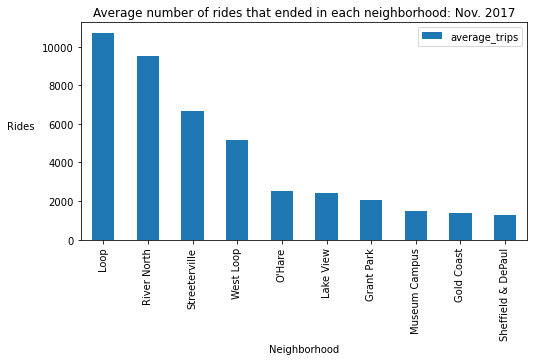

In [26]:
#Bar chart for neighborhood_trips_top_10_index
neighborhood_trips_top_10_index.plot(kind='bar', figsize = (8,4))
plt.title('Average number of rides that ended in each neighborhood: Nov. 2017')
plt.xlabel('Neighborhood', rotation=0)
plt.ylabel('Rides           ', rotation=0)
plt.show()

In [27]:
#Proportion of top 3 neighborhoods
neighborhood_trips_top_10_index['average_trips'][:4].sum()/neighborhood_trips_top_10_index['average_trips'].sum()

0.7417676440662289

Loop, River North, Streeterville and West Loop are the top 4 neighborhoods with highest average number of rides and they account for almost 75% of rides. These 4 four neighborhoods are located close to each other in the Central, Near North, and Near South Side of Chicago. We can confirm this in the following page: http://www.thechicago77.com/chicago-neighborhoods/. These neighborhoods very popular places in the city making it likely to transfer between these places. This explains the high amount of average trips.

In [28]:
#Getting top 10 companies
company_rides_index_top_10 = company_rides_index.head(10)
company_rides_index_top_10

,trips_amount
company_name,
Flash Cab,19558
Taxi Affiliation Services,11422
Medallion Leasin,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
Chicago Carriage Cab Corp,9181
City Service,8448
Sun Taxi,7701
Star North Management LLC,7455


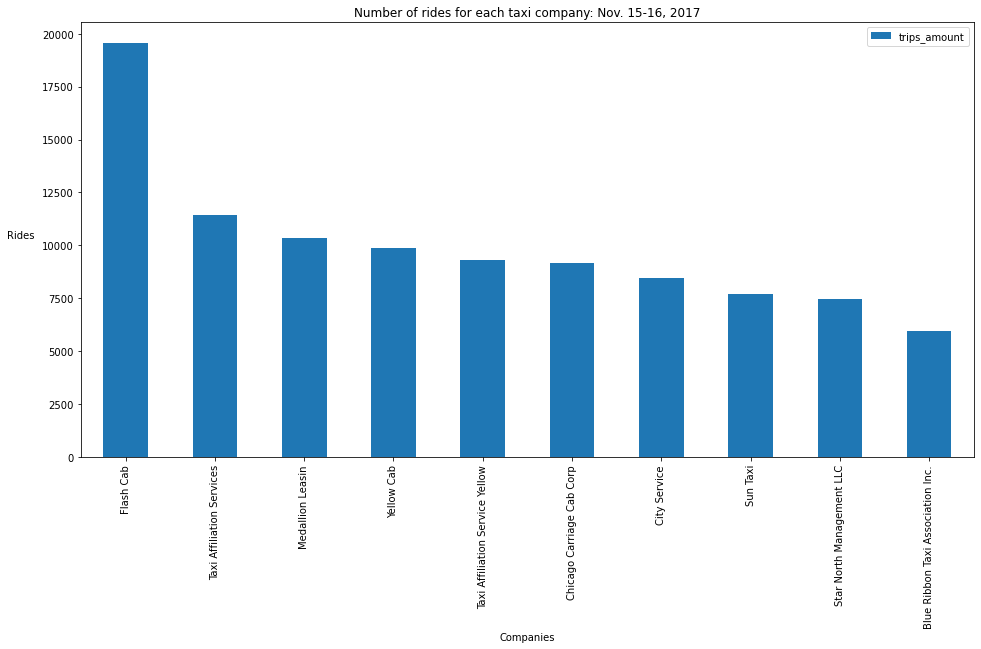

In [29]:
#Bar chart for company_rides_index_top_10
company_rides_index_top_10.plot(kind='bar', figsize = (16,8))
plt.title('Number of rides for each taxi company: Nov. 15-16, 2017')
plt.xlabel('Companies', rotation=0)
plt.ylabel('Rides           ', rotation=0)
plt.show()

In [30]:
#Proportion of top 6 companies in company_rides_index to account for all companies
company_rides_index['trips_amount'][:6].sum()/company_rides_index['trips_amount'].sum()

0.5077160606215089

The top 6 companies account for 50% of the marketshare.

- Flashcab began service in 1945 and differentiates itself by offering a flat rate for corporate rides from Loop to the suburbs. It also offers competitive pricing for trips to the O'Hare and Midway airports.
- Taxi Affiliation Services provides support services to transportation companies. They operate in the automobile rental and leasing industry.
- Medallion Leasing is a taxicab license manager.
- Yellow Cab was founded by Hertz and created the iconic yellow cab concept. It operates a taxicab fleet.
- Taxi Affiliation Services Yellow - unable to find information.
- Chicago Carriage Cab Corp operates a taxicab fleet.

<a id='4heading'></a>

## Testing hypotheses

In [31]:
#Making column with day of week
loop_to_airport['dow'] = pd.DatetimeIndex(loop_to_airport['start_ts']).dayofweek
loop_to_airport.head()

,start_ts,weather_conditions,duration_seconds,dow
0,2017-11-25 16:00:00,Good,2410,5
1,2017-11-25 14:00:00,Good,1920,5
2,2017-11-25 12:00:00,Good,1543,5
3,2017-11-04 10:00:00,Good,2512,5
4,2017-11-11 07:00:00,Good,1440,5


In [32]:
#Confirming all records are Saturdays
loop_to_airport['dow'].value_counts()

5    865
Name: dow, dtype: int64

In [33]:
#Query with dow = 5 (saturday) and query with rest of days
loop_to_airport_good_days = loop_to_airport.query('weather_conditions == "Good"')
loop_to_airport_bad_days = loop_to_airport.query('weather_conditions == "Bad"')

In [34]:
print("Clear days mean:", loop_to_airport_good_days['duration_seconds'].mean())
print("Rainy days mean:", loop_to_airport_bad_days['duration_seconds'].mean())
print('Clear days variance:', np.var(loop_to_airport_good_days['duration_seconds']))
print('Rainy days variance:', np.var(loop_to_airport_bad_days['duration_seconds']))

Clear days mean: 2049.2594142259413
Rainy days mean: 2409.2297297297296
Clear days variance: 567538.2925368935
Rainy days variance: 561003.0958729


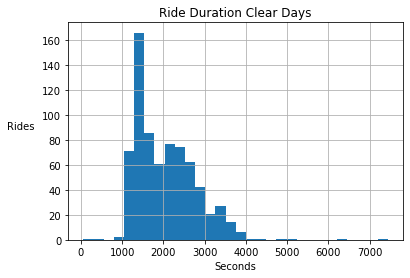

In [35]:
#Show distributions to check whether distributions are similar
loop_to_airport_good_days.hist('duration_seconds', bins = 30)
plt.title('Ride Duration Clear Days')
plt.xlabel('Seconds')
plt.ylabel('Rides           ', rotation=0)
plt.show()

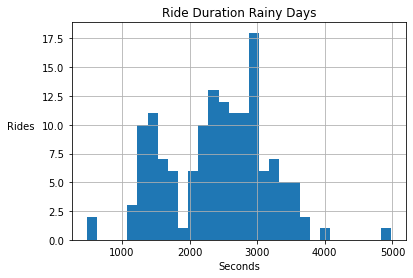

In [36]:
#Show distributions to check whether distributions are similar
loop_to_airport_bad_days.hist('duration_seconds', bins = 30)
plt.title('Ride Duration Rainy Days')
plt.xlabel('Seconds')
plt.ylabel('Rides           ', rotation=0)
plt.show()

<ins>Experiment<ins/>

Null Hypothesis H0: The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays

Alternative Hypothesis H1: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays

In [37]:
#Experiment
alpha = 0.05 #set a critical statistical significance level

results = st.ttest_ind(loop_to_airport_good_days['duration_seconds'], loop_to_airport_bad_days['duration_seconds'], equal_var = True) # test the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue) #print the p-value

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.5394237752380357e-07
We reject the null hypothesis


We've used the Hypothesis on the Equality of Two Population Means because we need to compare the means of two different statistical populations.

Our analysis suggests that ride duration for clear Saturday days and rainy Saturday days does differ because the p-value is such a miniscule amount lower than our 0.05 significance level.

We set the significance level at 0.05 because that level indicates a 5% risk of concluding that a difference exists when there is no actual difference. This level has been traditionally used in statistics. Additionally, we've set equal_var as True because the variances of both columns almost equal to each other.

<a id='5heading'></a>

## Overall Conclusion

We saw from our analysis that the top 4 neighborhoods account for almost 75% of the ride destinations in Chicago. These neighborhoods are Loop, River North, Streeterville and West Loop. This phenomenon is due to them being some of the most popular neighborhoods to visit in the city. They are also close to each other, which explains the high amount of rides in those areas. Zuber can make an effort to have a high amount of riders roam those areas in order to capture the high demand.

We noticed that the top 6 taxi/ride-sharing competitors actually own 50% of the market share. Zuber can expand its business operations participating in the automobile rental and leasing industry and open up rental points in the most popular neighborhoods.

After doing our statistical experiment, we found out that ride duration does differ between between rainy Saturdays and clear Saturday since our p-value happened to be a miniscule amount. After taking their means, we noticed that rides on clear Saturdays are on-average 360 seconds / 6 minutes shorter than rides on rainy Saturdays.

A 6 minute difference in rides between rainy and clear days is quite drastic. When a day is rainy, demand to order a ride increases when the alternative is public transportation. This increase in demand allows for Zuber to charge more for rides to the airport on rainy days. We have to take into account that traffic probably increases on a rainy day (increasing cost per ride since rides take longer), which further justify an increase in price by Zuber.
